where does student fail? is it the harder or easier sequences? uncertainty?
- is it the harder or easier sequences? (as indicated by the teacher uncertainty)
- to this end, we can use the teacher uncertainty as a proxy for the difficulty of the sequence, and inspect teacher uncertainty for the sequences where the student fails

In [1]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset
df_test = pd.read_csv('../data/robustness_study/preprocessed/test.csv', sep='\t', index_col=0)
df_test.head()

,text,target
0,in class still drunk from last night and this ...,1
1,sighs of relief from beijing guoan fans <hasht...,0
2,<user> <user> <user> they do why else do teach...,1
3,preparing to be called a nigger all night i me...,1
4,rt <user> we dont love these hoes <url>,1


In [3]:
# load the predictions - focus on MC dropout
# teacher predictions
with open('../out/bert_teacher/final_hd020_ad030_cd020/results/results.json', 'r') as f:
    teacher_mcd_results = json.load(f)
    
# student predictions
with open('../out/bert_student/aleatoric_and_epistemic/m5_k10/e2/results/results.json', 'r') as f:
    student_mcd_results = json.load(f)

In [4]:
teacher_mcd_predictions = pd.DataFrame({'y_true': teacher_mcd_results['y_true'],
                                        'y_pred': teacher_mcd_results['y_pred'],
                                        'y_prob': teacher_mcd_results['y_prob'],
                                        'total_uncertainty': teacher_mcd_results['total_uncertainty'],
                                       },
                                       index=df_test.index)

teacher_mcd_predictions.head()

,y_true,y_pred,y_prob,total_uncertainty
0,1,1,0.997665,0.076296
1,0,0,0.027636,0.089676
2,1,1,0.997591,0.099287
3,1,1,0.995800,0.344908
4,1,1,0.998120,0.033533


In [5]:
student_mcd_predictions = pd.DataFrame({'y_true': student_mcd_results['y_true'],
                                        'y_pred': student_mcd_results['y_pred'],
                                        'y_prob': student_mcd_results['y_prob'],
                                        'total_uncertainty': student_mcd_results['total_uncertainty'],
                                       },
                                       index=df_test.index)

student_mcd_predictions.head()

,y_true,y_pred,y_prob,total_uncertainty
0,1,1,0.998567,33.030453
1,0,0,0.015383,44.247200
2,1,1,0.998516,31.581087
3,1,1,0.998464,33.331455
4,1,1,0.998553,28.962753


In [6]:
# TODO: how do we compute total uncertainty, this seems incorrect 

In [7]:
# get all sequences that teacher gets right and student gets wrong
# teacher gets right
teacher_correct = teacher_mcd_predictions[teacher_mcd_predictions['y_true'] == teacher_mcd_predictions['y_pred']]
# student gets wrong
student_wrong = student_mcd_predictions[student_mcd_predictions['y_true'] != student_mcd_predictions['y_pred']]

In [8]:
# get the sequences where the teacher gets right and the student gets wrong
teacher_correct_student_wrong = teacher_correct[teacher_correct.index.isin(student_wrong.index)]

In [9]:
# subset corresponding student predictions
student_wrong_teacher_correct = student_wrong.loc[teacher_correct_student_wrong.index]

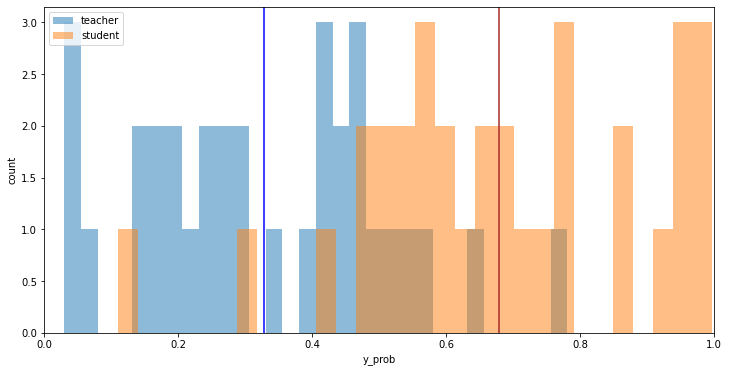

In [10]:
# plot teacher y_prob for the sequences where the teacher gets right and the student gets wrong along with mean
plt.figure(figsize=(12, 6))
plt.hist(teacher_correct_student_wrong['y_prob'], bins=30, alpha=0.5, label='teacher')
plt.axvline(teacher_correct_student_wrong['y_prob'].mean(), color='blue')
plt.hist(student_wrong_teacher_correct['y_prob'], bins=30, alpha=0.5, label='student')
plt.axvline(student_wrong_teacher_correct['y_prob'].mean(), color='brown')
plt.xlabel('y_prob')
plt.ylabel('count')
plt.xlim(0, 1)
plt.legend();

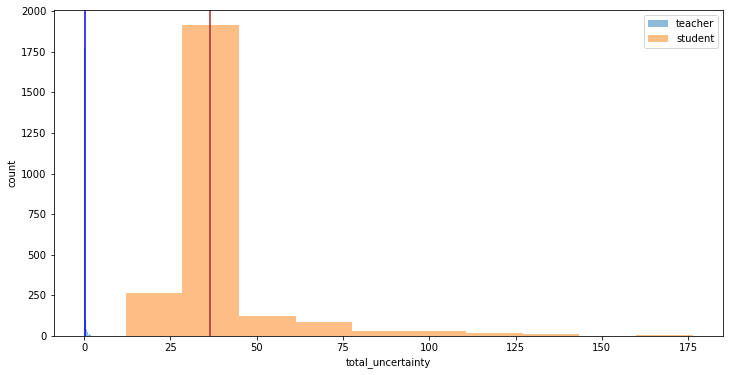

In [11]:
# total uncertainty - overall teacher vs student and for the sequences where the teacher gets right and the student gets wrong
plt.figure(figsize=(12, 6))
plt.hist(teacher_mcd_predictions['total_uncertainty'], bins=30, alpha=0.5, label='teacher')
plt.axvline(teacher_mcd_predictions['total_uncertainty'].mean(), color='blue')
plt.hist(student_mcd_predictions['total_uncertainty'], alpha=0.5, label='student')
plt.axvline(student_mcd_predictions['total_uncertainty'].mean(), color='brown')
plt.xlabel('total_uncertainty')
plt.ylabel('count')
plt.legend();

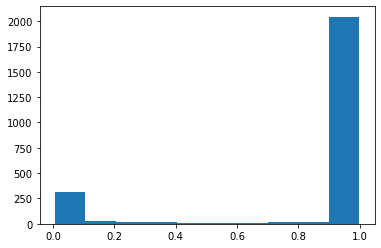

In [12]:
plt.hist(student_mcd_predictions['y_prob'], bins=10);